## ***Name : `Fawad Ali Shaikh`***
## ***Course : `Data Science`***

In [1]:
!pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
! kaggle datasets download nadeemajeedch/employee-performance-and-salary-dataset


Dataset URL: https://www.kaggle.com/datasets/nadeemajeedch/employee-performance-and-salary-dataset
License(s): Community Data License Agreement - Sharing - Version 1.0
  0% 0.00/215k [00:00<?, ?B/s]
100% 215k/215k [00:00<00:00, 50.9MB/s]


In [6]:
# Unzip Dataset

! unzip /content/employee-performance-and-salary-dataset.zip


Archive:  /content/employee-performance-and-salary-dataset.zip
  inflating: 50_Tasks_to_perform_on_dataset.pdf  
  inflating: Employe_Performance_dataset.csv  


In [7]:
# To handle data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [8]:
df = pd.read_csv('Employe_Performance_dataset.csv')
df.head()

,ID,Name,Age,Gender,Department,Salary,Joining Date,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015-05-03,2.0,16,Active,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020-11-09,2.0,11,Inactive,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019-02-12,NaN,1,Inactive,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017-09-08,2.0,13,Inactive,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020-02-15,5.0,16,Inactive,New York,Evening


In [9]:
# Shape of dataset

df.shape

(1000, 12)

In [10]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 1000
Number of columns: 12


In [11]:
# Columns' name in the dataset

df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Department', 'Salary', 'Joining Date',
       'Performance Score', 'Experience', 'Status', 'Location', 'Session'],
      dtype='object')

In [12]:
# Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Name               1000 non-null   object 
 2   Age                1000 non-null   int64  
 3   Gender             1000 non-null   object 
 4   Department         1000 non-null   object 
 5   Salary             1000 non-null   int64  
 6   Joining Date       1000 non-null   object 
 7   Performance Score  502 non-null    float64
 8   Experience         1000 non-null   int64  
 9   Status             1000 non-null   object 
 10  Location           1000 non-null   object 
 11  Session            1000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [13]:
# Summary

df.describe()

,ID,Age,Salary,Performance Score,Experience
count,1000.000000,1000.000000,1000.000000,502.000000,1000.000000
mean,500.500000,40.782000,5917.374000,2.910359,10.120000
std,288.819436,14.124871,2299.418003,1.424736,5.713689
min,1.000000,18.000000,2015.000000,1.000000,1.000000
25%,250.750000,28.000000,3829.750000,2.000000,5.000000
50%,500.500000,40.000000,5889.000000,3.000000,10.000000
75%,750.250000,52.000000,7903.250000,4.000000,15.000000
max,1000.000000,65.000000,9993.000000,5.000000,20.000000


In [14]:
df.nunique()

,0
ID,1000
Name,992
Age,48
Gender,3
Department,3
Salary,941
Joining Date,856
Performance Score,5
Experience,20
Status,2


In [15]:
# Check Null Values

print(df.isnull().sum())

ID                     0
Name                   0
Age                    0
Gender                 0
Department             0
Salary                 0
Joining Date           0
Performance Score    498
Experience             0
Status                 0
Location               0
Session                0
dtype: int64


In [16]:
print(f'So we have {df["Performance Score"].isnull().sum()} null values in Performance Score.')

So we have 498 null values in Performance Score.


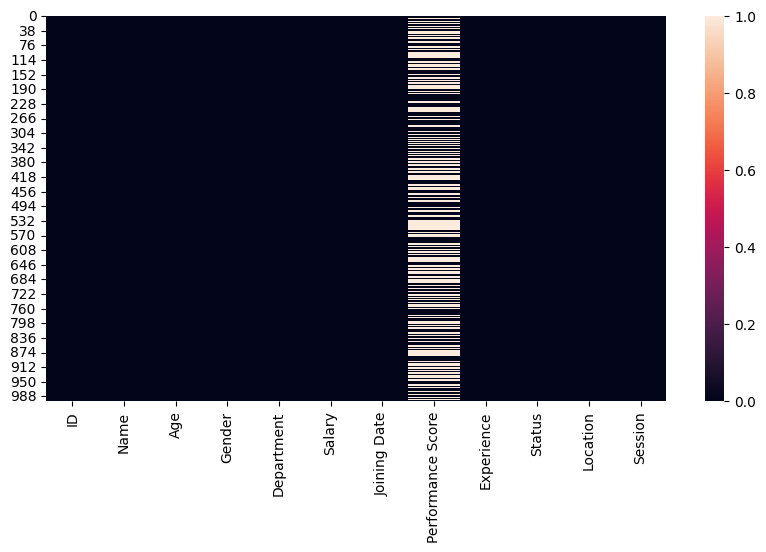

In [17]:
# Heatmap of Missing Values

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

***This Heatmap shows null values in ` Performance Score`.***

In [18]:
# Check duplicate vlues

df.duplicated().sum()

0

In [19]:
print(f'So we have {df.duplicated().sum()} duplicate values in the dataset.')

So we have 0 duplicate values in the dataset.


## ***Let's Remove `Null Values`***

In [20]:
# remove null values using machine learning

imputer = SimpleImputer(strategy='median')
df['Performance Score'] = imputer.fit_transform(df[['Performance Score']])


In [21]:
print(df.isnull().sum())

ID                   0
Name                 0
Age                  0
Gender               0
Department           0
Salary               0
Joining Date         0
Performance Score    0
Experience           0
Status               0
Location             0
Session              0
dtype: int64


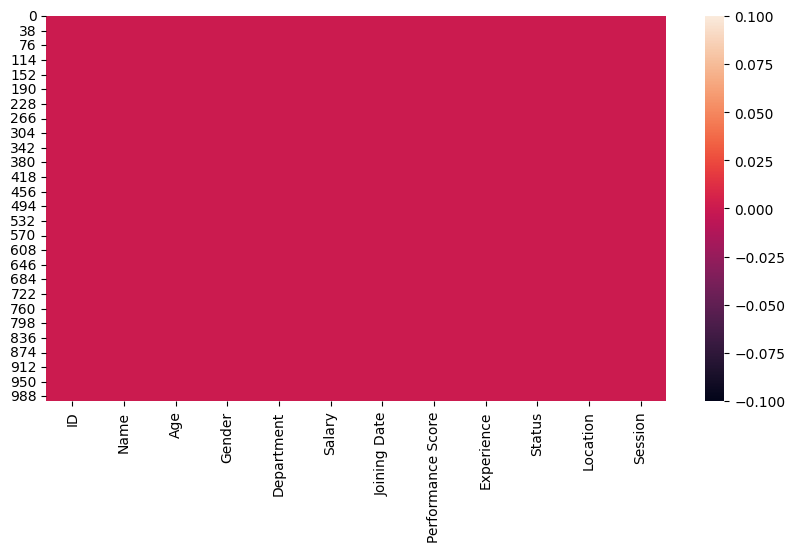

In [22]:
# Heatmap of Missing Values

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

***So, this Heatmap shows there is no null values in the dataset.***

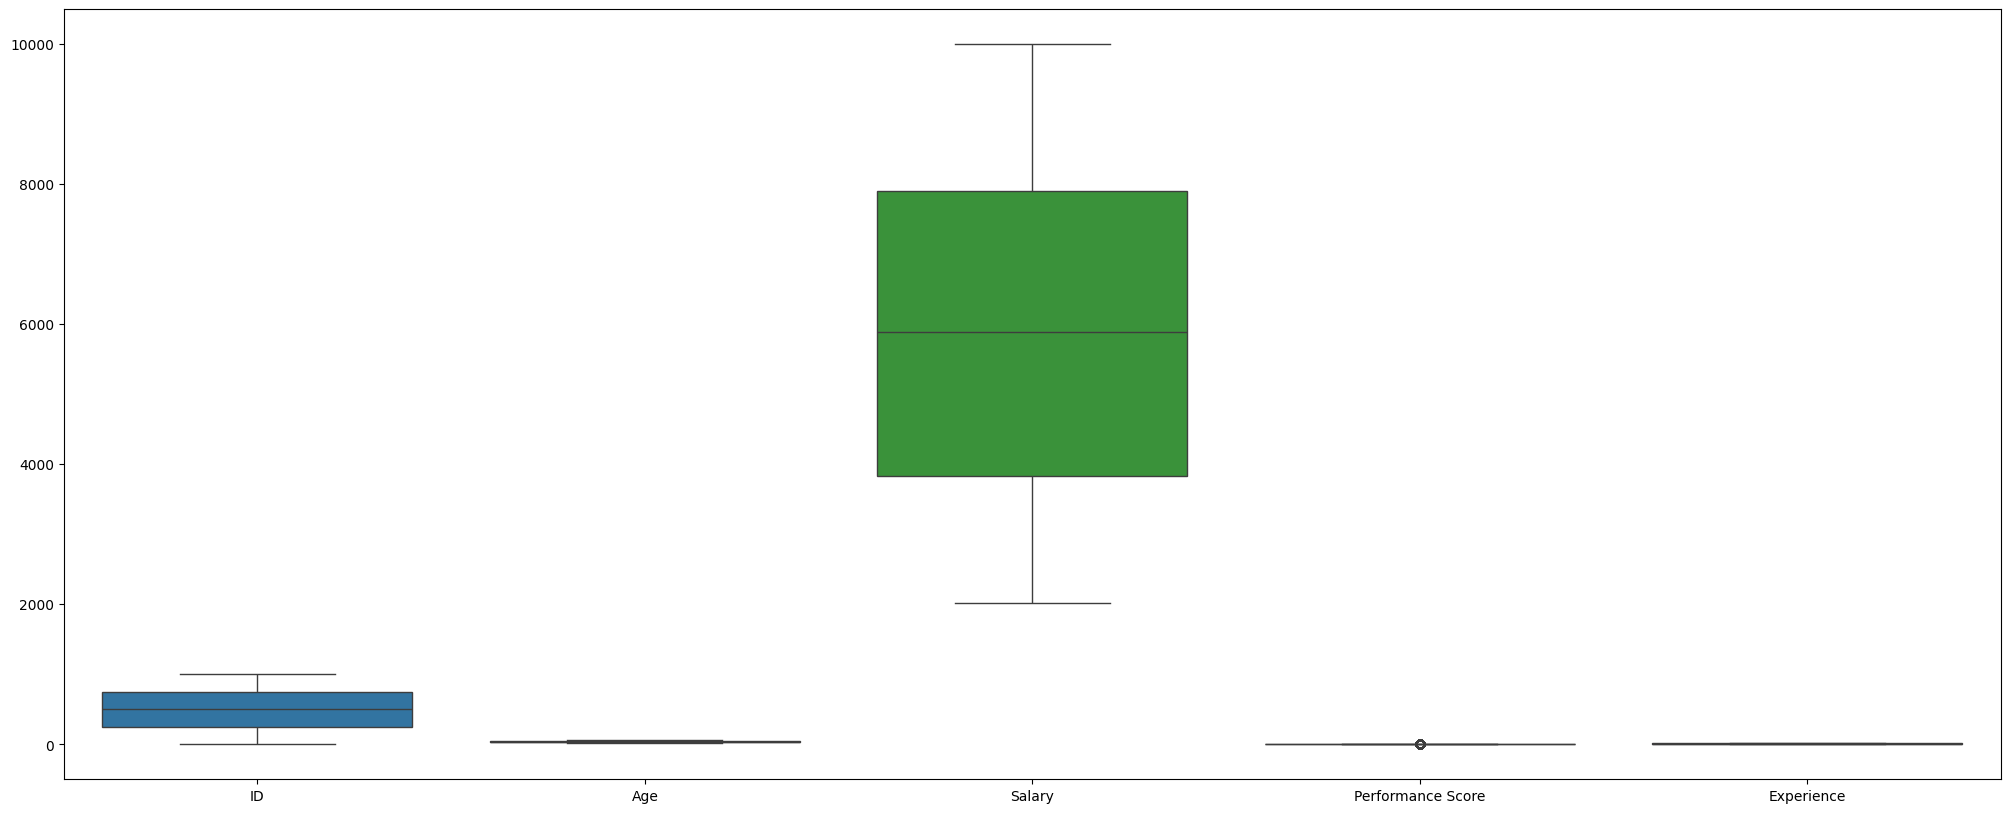

In [24]:
# Check outliers

plt.figure(figsize=(25,10))
sns.boxplot(data=df)
plt.show()

***This Box Plot shows `Standard Deviation`, `IQR`, `Mean`,` Min - Max` and also `outliers`.***

<Axes: ylabel='Performance Score'>

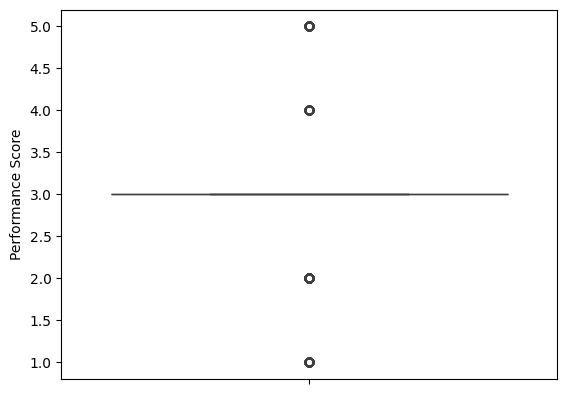

In [25]:
sns.boxplot(data=df['Performance Score'])

In [27]:
print('So we have outliers in "Performance Score"')

So we have outliers in "Performance Score"


In [28]:
df.head()

,ID,Name,Age,Gender,Department,Salary,Joining Date,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015-05-03,2.0,16,Active,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020-11-09,2.0,11,Inactive,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019-02-12,3.0,1,Inactive,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017-09-08,2.0,13,Inactive,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020-02-15,5.0,16,Inactive,New York,Evening


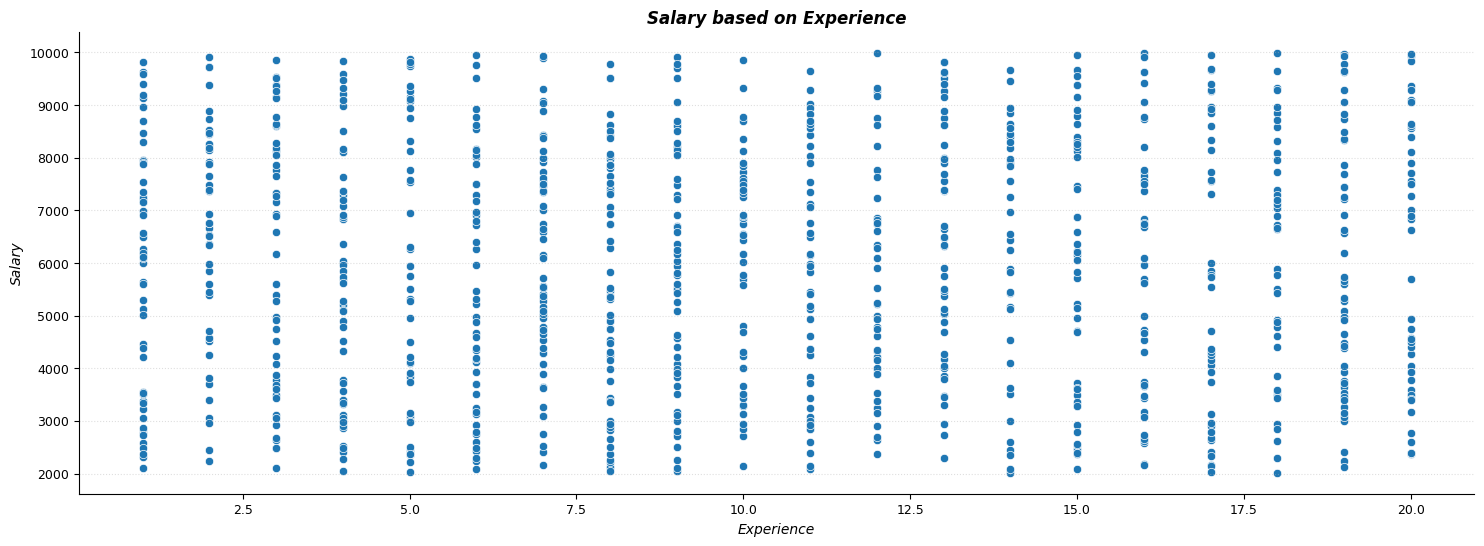

In [41]:
# chart

plt.figure(figsize=(18, 6))
sns.scatterplot(x= 'Experience',y= 'Salary', data=df,palette='Set2')
plt.title('Salary based on Experience',fontsize=12, fontweight='bold',fontstyle='italic')
plt.xlabel('Experience', fontsize=10, fontstyle='italic')
plt.ylabel('Salary', fontsize=10, fontstyle='italic')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
sns.despine()
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.show()

***A `scatter plot` is a way to visualize the relationship between two numerical variables. Here is a general trend where `salary` tends to increase with `experience`.***

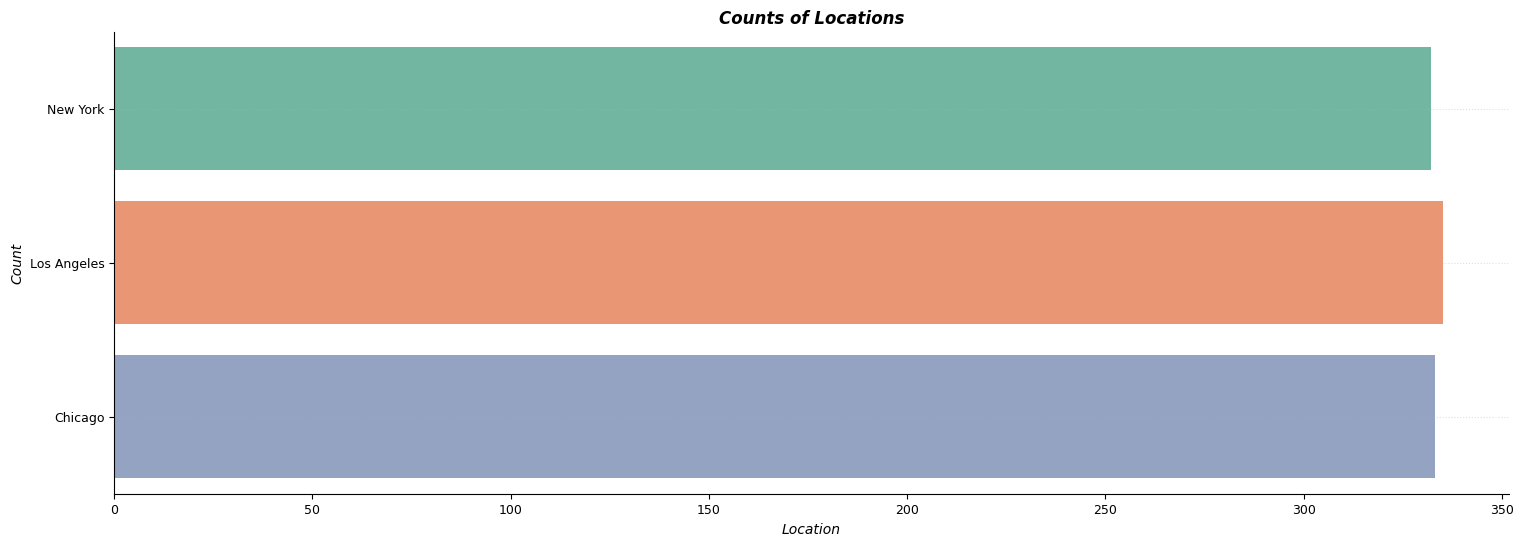

In [47]:
# chart

plt.figure(figsize=(18, 6))
sns.countplot(df['Location'], palette='Set2')
plt.title('Counts of Locations',fontsize=12, fontweight='bold',fontstyle='italic')
plt.xlabel('Location', fontsize=10, fontstyle='italic')
plt.ylabel('Count', fontsize=10, fontstyle='italic')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
sns.despine()
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.show()

* ***A `countplot` is used to show the counts of observations in each categorical bin using bars.***
* *** It displays the counts for the different categories within the `Location` variable.***
* ***Each` bar's height` corresponds to the number of times each `location` appears in the dataset.***

In [50]:
df.corr(numeric_only=True)

,ID,Age,Salary,Performance Score,Experience
ID,1.000000,0.038473,0.045047,0.000146,0.016102
Age,0.038473,1.000000,-0.032772,-0.044124,0.005645
Salary,0.045047,-0.032772,1.000000,0.001703,0.003882
Performance Score,0.000146,-0.044124,0.001703,1.000000,-0.007043
Experience,0.016102,0.005645,0.003882,-0.007043,1.000000


<Axes: >

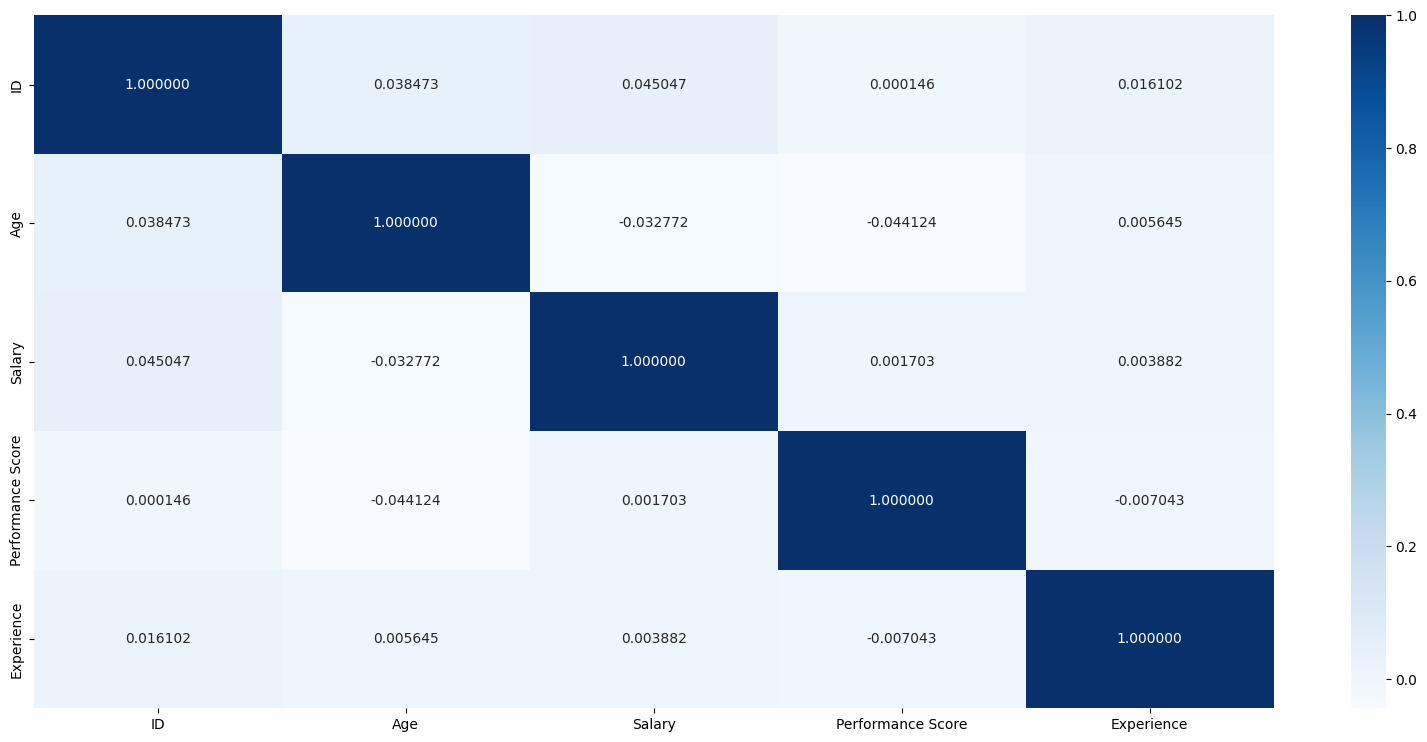

In [54]:
plt.figure(figsize=(20, 9))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues',fmt='f')

***It represents `relation` between variables or features ,***


* ***A dark blue cell at the intersection of `Salary` and `Experience` suggests there might be a `strong positive` correlation between salary and experience (meaning higher experience tends to be associated with higher salary).***
*   ***lighter colors represents the weak correlation.***




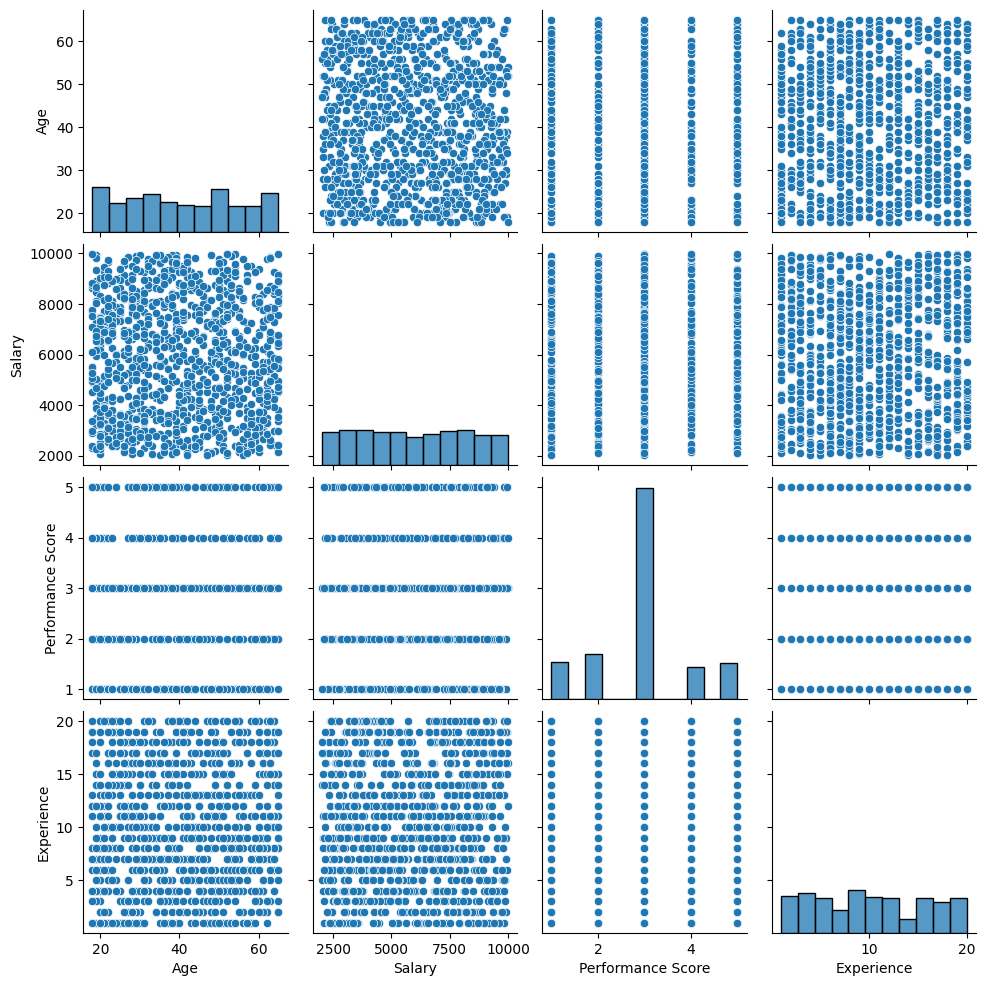

In [39]:
sns.pairplot(df.drop('ID',axis=1))

***It shows all the plots or charts. It visualize the relationships between multiple variables in a dataset.***